<a href="https://colab.research.google.com/github/Vivek-Joshi17/CNN_neural_network/blob/main/CNN_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#unzip the file
zip_ref =zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-01-04 06:31:43--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.117.207, 142.250.99.207, 173.194.202.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.117.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   175MB/s    in 0.6s    

2024-01-04 06:31:43 (175 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [4]:
import os
#walk through pizza_steak directory and list number of files

for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)}images in '{dirpath}'.")

There are 2 directories and 0images in 'pizza_steak'.
There are 2 directories and 0images in 'pizza_steak/train'.
There are 0 directories and 750images in 'pizza_steak/train/pizza'.
There are 0 directories and 750images in 'pizza_steak/train/steak'.
There are 2 directories and 0images in 'pizza_steak/test'.
There are 0 directories and 250images in 'pizza_steak/test/pizza'.
There are 0 directories and 250images in 'pizza_steak/test/steak'.


In [5]:
### Another way to find out how many images are in a file

num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [6]:
# get the classnames programmatically

import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names =np.array(sorted([item.name for item in data_dir.glob("*")]))
# it creat a list of class_names frim the subdirectories

print(class_names)

['pizza' 'steak']


In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

#A function which picks images of pizza/steak randomly
def view_random_images(target_dir,target_class):
  # set up target directory
  target_folder =target_dir+"/" +target_class

  # get random image path
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)
  # read and plot image
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")


  print(f"Image shape: {img.shape}")

  return img

['3008192.jpg']
Image shape: (512, 512, 3)


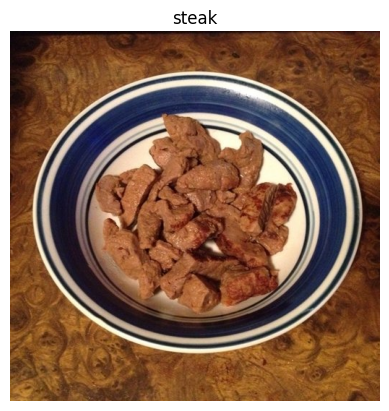

In [8]:
# view random image from training dataset
img = view_random_images(target_dir="pizza_steak/train",
                        target_class="steak")

#An end to end example

A convolutional neural network to find pattern in our images , more specifically we need a way to :

* load our images
* preprocess our images
* build a cnn to find patterns in our images
* compile our cnn
* fit the cnn to our training data

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#set the seed
tf.random.set_seed(42)

#preprocess data(get all of the pixel values between 0 and 1 also called normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#setup paths to our data directories
train_dir ="/content/pizza_steak/train"
test_dir ="/content/pizza_steak/test"

#Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size =32,
                                               target_size=(224,224),
                                               class_mode ="binary",
                                               seed = 42)

valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode ="binary",
                                               seed=42)

###A basic CNN model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation ="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding ="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")

])

###Compile CNN
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

### Fit the model
history_1 = model_1.fit(train_data,epochs=5,
                        steps_per_epoch =len(train_data),
                        validation_data =valid_data,
                        validation_steps=len(valid_data)
                        )


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 31s 325ms/step - loss: 0.5709 - accuracy: 0.6760 - val_loss: 0.3881 - val_accuracy: 0.8240
Epoch 2/5
47/47 [==============================] - 6s 123ms/step - loss: 0.4232 - accuracy: 0.8153 - val_loss: 0.3933 - val_accuracy: 0.8540
Epoch 3/5
47/47 [==============================] - 7s 138ms/step - loss: 0.3737 - accuracy: 0.8533 - val_loss: 0.4087 - val_accuracy: 0.8100
Epoch 4/5
47/47 [==============================] - 6s 120ms/step - loss: 0.3275 - accuracy: 0.8747 - val_loss: 0.2886 - val_accuracy: 0.8800
Epoch 5/5
47/47 [==============================] - 6s 137ms/step - loss: 0.2769 - accuracy: 0.8900 - val_loss: 0.2953 - val_accuracy: 0.8840


In [10]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

In [11]:
### Doing image classification with regression model
tf.random.set_seed(42)

#Regression model for classification
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

#Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

#Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch = len(train_data),
                        validation_data =valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 130ms/step - loss: 0.8422 - accuracy: 0.5053 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 6s 138ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 6s 131ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 6s 125ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 5s 115ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [12]:
#sumaary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Despite having 20x more parameters than our CNN(model_1), model_2 not performing well.Improving model_2

In [13]:
#set the random seed
tf.random.set_seed(42)

#creating the model(same as model_2 with different params)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation ="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")

])

#compile the model_3
model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

# Fitting the model
model_3.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data)
            )

Epoch 1/5
47/47 [==============================] - 6s 110ms/step - loss: 3.3878 - accuracy: 0.6560 - val_loss: 1.2470 - val_accuracy: 0.6840
Epoch 2/5
47/47 [==============================] - 6s 131ms/step - loss: 1.2404 - accuracy: 0.6900 - val_loss: 0.7623 - val_accuracy: 0.7700
Epoch 3/5
47/47 [==============================] - 5s 105ms/step - loss: 0.7006 - accuracy: 0.7520 - val_loss: 0.4777 - val_accuracy: 0.7740
Epoch 4/5
47/47 [==============================] - 7s 146ms/step - loss: 0.4908 - accuracy: 0.7853 - val_loss: 0.4279 - val_accuracy: 0.7940
Epoch 5/5
47/47 [==============================] - 5s 107ms/step - loss: 0.5155 - accuracy: 0.7820 - val_loss: 1.2441 - val_accuracy: 0.5580


In [14]:
#model_3 summary comparision with model_1 and model_2
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15063101 (57.46 MB)
Trainable params: 15063101 (57.46 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Model_3 has 500 times more trainable params but still it has accuracy of 75% which is better than model_2 but far less than our CNN model model_1

#Binary classification
1. Understand data
2. Preprocess the data(scaling,normalizing,turing data into batches)
3. Create a model(start with baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve it

#1. Understanding the data

['317206.jpg']
Image shape: (382, 512, 3)
['2448844.jpg']
Image shape: (512, 512, 3)


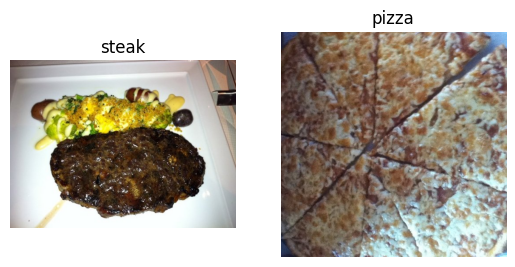

In [19]:
### Understanding the data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_images("pizza_steak/train","steak")
plt.subplot(1,2,2)
steak_img = view_random_images("pizza_steak/train","pizza")


#2. Preprocess the data

In [20]:
#Define directory datset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"


Turn our dataset into batches
A batch is a small subset of data. Rather than look at all images,our model only look at images that are size of the batch at a time.

It does this for a couple of reasons:
1. 10000 images (or more) might not fit into memory of your preprocessor
2. Trying to learn the patterns in 10000 images in one hit could result in the odel noot being able to learn very well.

*32 is default batch size*

In [21]:
#create thrain and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [24]:
#Load  in our image data fro directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,#Target directory of images
                                                 target_size=(224,224),#Target size of images (height,width)
                                                 class_mode="binary",#Type of data you're working with
                                                 batch_size=32)#size of mini batches to load data into
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [26]:
#Get a sample of a train data batch
images,labels = train_data.next()#get the "next" batch of images/labels in train_data
len(images), len(labels),len(train_data)

(32, 32, 47)

In [27]:
#Get the first two images
images[:2],images[0].shape

(array([[[[0.01568628, 0.01568628, 0.02352941],
          [0.01568628, 0.01568628, 0.02352941],
          [0.01960784, 0.01960784, 0.02745098],
          ...,
          [0.01568628, 0.01568628, 0.02352941],
          [0.01568628, 0.01568628, 0.02352941],
          [0.01960784, 0.01960784, 0.02745098]],
 
         [[0.01568628, 0.01568628, 0.02352941],
          [0.01568628, 0.01568628, 0.02352941],
          [0.01960784, 0.01960784, 0.02745098],
          ...,
          [0.01568628, 0.01568628, 0.02352941],
          [0.01568628, 0.01568628, 0.02352941],
          [0.01960784, 0.01960784, 0.02745098]],
 
         [[0.01568628, 0.01568628, 0.02352941],
          [0.01568628, 0.01568628, 0.02352941],
          [0.01960784, 0.01960784, 0.02745098],
          ...,
          [0.01568628, 0.01568628, 0.02352941],
          [0.01568628, 0.01568628, 0.02352941],
          [0.01960784, 0.01960784, 0.02745098]],
 
         ...,
 
         [[0.6392157 , 0.6       , 0.6039216 ],
          [0.62745

In [28]:
labels

array([1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
       1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.],
      dtype=float32)

#3. Create a CNN model(baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting ,you try to beat the baseline.

**Note:** In deep learning,there is almost an infinite amount of architecture you could create.So one of the best ways to get started is to start with something simple an see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field for your problem)


In [29]:
#Make the creating of model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras import Sequential

In [30]:
#Creating the model (this will be our baseline, a layer convolutional neural network )
model_4 = Sequential([
    Conv2D(filters = 10,
           kernel_size=3,
           strides =1,
           padding ="valid",
           activation ="relu",
           input_shape=(224,224,3)),#specify input shape
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation = "relu"),
    Flatten(),
    Dense(1,activation="sigmoid")#output layer (working with binary classificaiton so only 1 output neuron)
])

In [31]:
#compile the model_4
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [32]:
#Get the summary of our model_4
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_7 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#4. Fit the model_4

In [34]:
#Check the lengths of training  and test data generators
len(train_data),len(test_data)

(47, 16)

In [35]:
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 8s 126ms/step - loss: 1.7190 - accuracy: 0.6720 - val_loss: 0.5007 - val_accuracy: 0.7740
Epoch 2/5
47/47 [==============================] - 8s 179ms/step - loss: 0.4516 - accuracy: 0.8067 - val_loss: 0.4304 - val_accuracy: 0.8020
Epoch 3/5
47/47 [==============================] - 6s 117ms/step - loss: 0.3242 - accuracy: 0.8780 - val_loss: 0.4016 - val_accuracy: 0.8200
Epoch 4/5
47/47 [==============================] - 6s 131ms/step - loss: 0.1688 - accuracy: 0.9447 - val_loss: 0.5121 - val_accuracy: 0.7960
Epoch 5/5
47/47 [==============================] - 5s 113ms/step - loss: 0.0785 - accuracy: 0.9807 - val_loss: 0.5708 - val_accuracy: 0.7800


Model_1 is still the best among all .We have to add more convolutional layers to current baseline model_4

#5. Evaluting our model

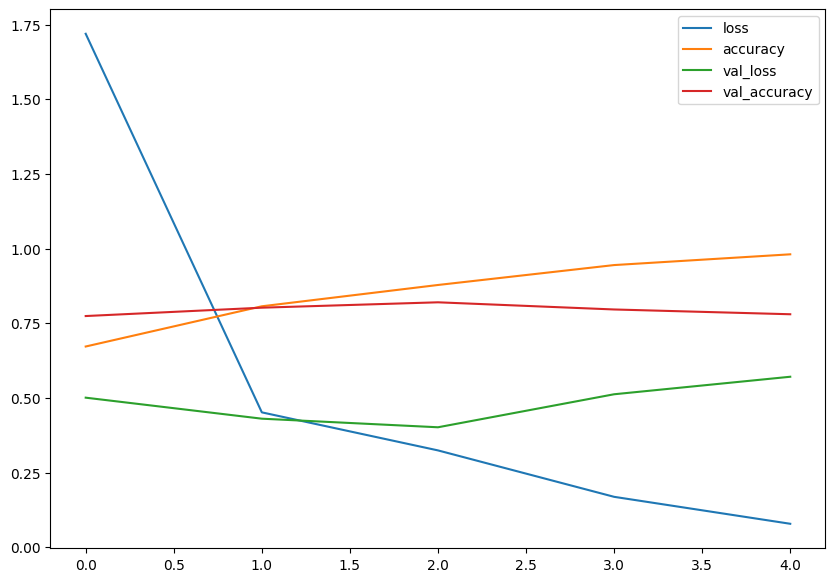

In [37]:
#Training curves plotting
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7));

In [50]:
#Plotting the validation and training curves separately
def plot_loss_curves(history):
  """
    Returns separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))#how many epochs did we run for?

  #Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()


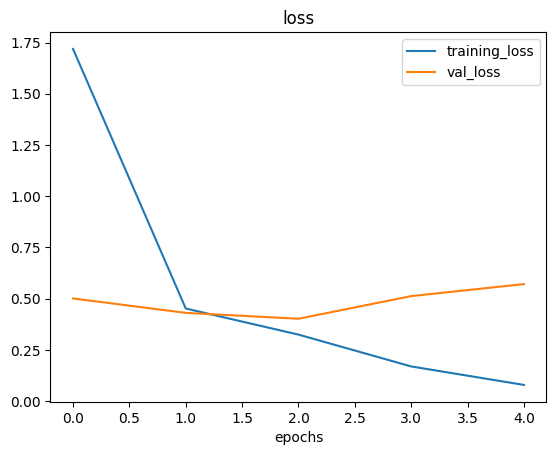

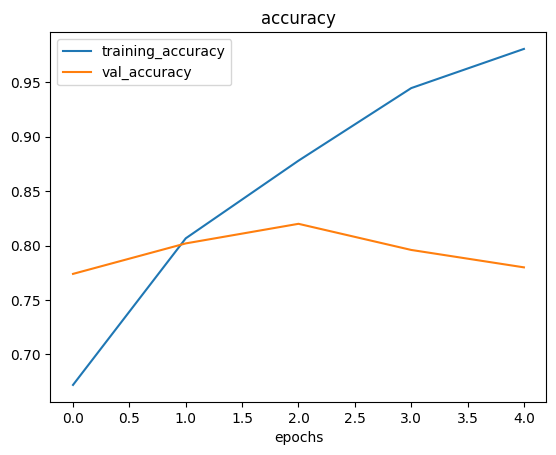

In [51]:
# Loss and accuracy of madel_4
plot_loss_curves(history_4)

**NOTE:** When a model's **validation loss starts to increase**,it's likely the model is **overfitting**

This means it'learning the paters in the training dataset *too well* abd thus the model's ability to generalize to unseen data will be dimished.

###6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:
0. Create a Baseline
1. Beat  the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of Conv2D layers
* Increase the number of filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization(such as MaxPool2D )
* Add more data...

>**Note:** Reducing overfitting is called regularization

In [45]:
###Creating the model (new baseline model)
model_5 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           activation="relu",
           input_shape=(224,224,3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(2),
    Flatten(),
    Dense(1,activation="sigmoid")

])


In [53]:
#compile the model_5
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [54]:
#Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 6s 110ms/step - loss: 0.3356 - accuracy: 0.8620 - val_loss: 0.4768 - val_accuracy: 0.7720
Epoch 2/5
47/47 [==============================] - 6s 129ms/step - loss: 0.3131 - accuracy: 0.8753 - val_loss: 0.3248 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 5s 108ms/step - loss: 0.2686 - accuracy: 0.8947 - val_loss: 0.2995 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 6s 121ms/step - loss: 0.2483 - accuracy: 0.9027 - val_loss: 0.3408 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 5s 115ms/step - loss: 0.2133 - accuracy: 0.9180 - val_loss: 0.3574 - val_accuracy: 0.8480


In [55]:
#Summary of our model with max pooling
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 10)       

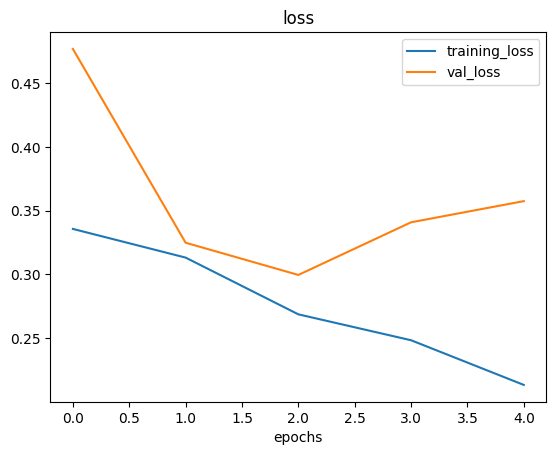

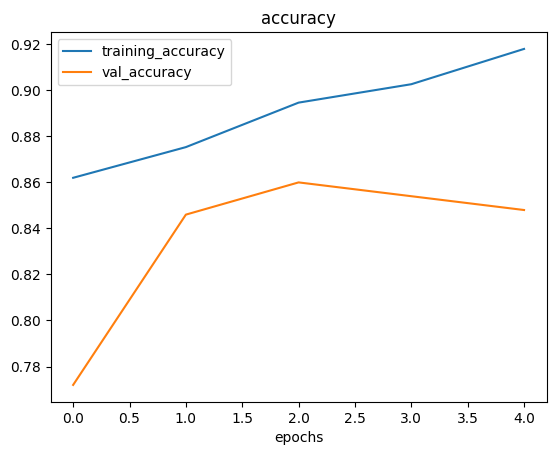

In [56]:
#plot loss curves
plot_loss_curves(history_5)

After adding *MaxPool* layer graph still showing the sign of *overfitting*

Next model we add more convolutional and maxpool layer

In [57]:
#Creating model_6
model_6 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           activation="relu",
           input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(pool_size = 2),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(2),
    Flatten(),
    Dense(1,activation="sigmoid")

])

In [58]:
#compile the model_6
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [59]:
#Fit the model
history_6 = model_6.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 144ms/step - loss: 0.5703 - accuracy: 0.7220 - val_loss: 0.3980 - val_accuracy: 0.8420
Epoch 2/5
47/47 [==============================] - 6s 120ms/step - loss: 0.4437 - accuracy: 0.7960 - val_loss: 0.3529 - val_accuracy: 0.8580
Epoch 3/5
47/47 [==============================] - 6s 121ms/step - loss: 0.4060 - accuracy: 0.8180 - val_loss: 0.3305 - val_accuracy: 0.8640
Epoch 4/5
47/47 [==============================] - 6s 125ms/step - loss: 0.3841 - accuracy: 0.8313 - val_loss: 0.3342 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 6s 135ms/step - loss: 0.3684 - accuracy: 0.8440 - val_loss: 0.3354 - val_accuracy: 0.8620


In [60]:
model_6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_11 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_13 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                 

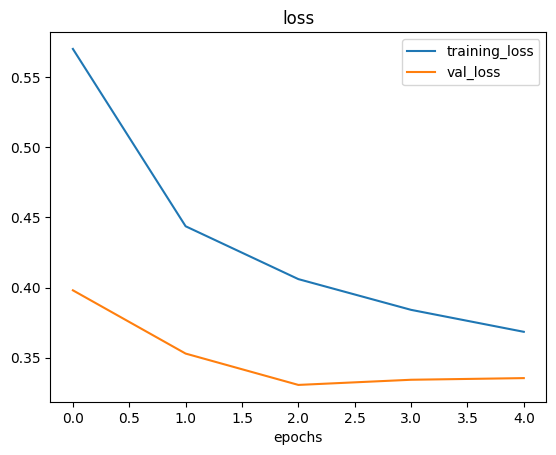

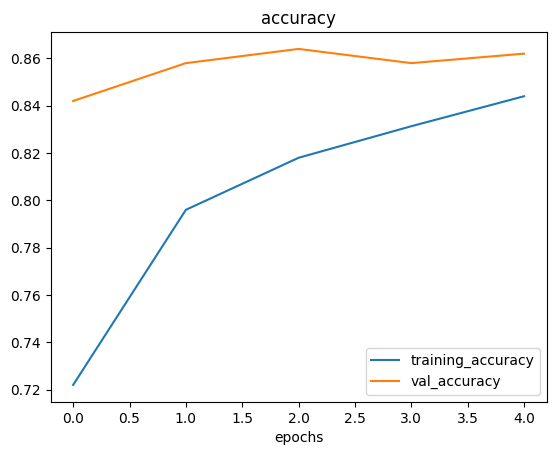

In [63]:
plot_loss_curves(history_6)

#Data Augmentation

Data augmentaion is the process of altering our training data,leading it to have nore diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it ,cropping it or something similar.

In [66]:
#create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1./255,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range = 0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip= True)

#create ImageGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1./255.)

#Create ImageDataGenerator withour data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale = 1./255.)


In [71]:
#Import data and augment it from training directory
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size = 32,
                                                                   class_mode="binary",
                                                                   shuffle = False)#For demostration purposes only

#Create non-augmented train data batches
print("Non-augmented training data")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle = False)# for demonstration purpose only

#create non-augmented test data batch
print("Non-augmented test data:")
test_data =test_datagen.flow_from_directory(test_dir,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode="binary")


Augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


**Note:** Data augmentation is usually only performed on the training data.Using ImageDataGenerator build in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

In [72]:
#Get sample data betches
images,labels = train_data.next()
augmented_images,augmented_labels=train_data_augmented.next()
len(images),len(labels),len(augmented_images),len(augmented_labels)

(32, 32, 32, 32)

showing image number: 0


(-0.5, 223.5, 223.5, -0.5)

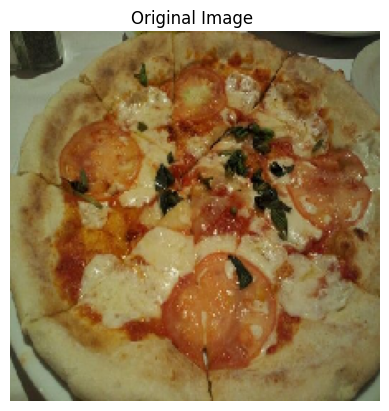

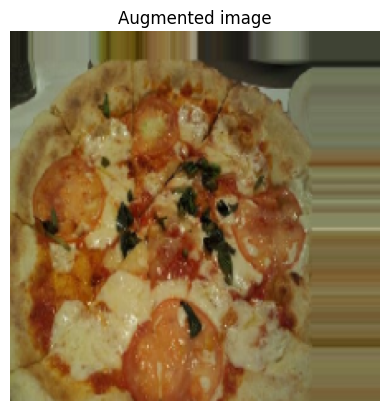

In [73]:
#Show original image and augmented image
import random
random_number = random.randint(0,32)
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original Image ")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)